# Makine Öğrenmesi ile Değişen Yıldızları Sınıflama

## Değişen Yıldızlar

Değişen Yıldızlar Astronomide önemli yer tutan gök cisimleridir. Yıldızlar evrimleştikçe parlaklık, renk, tayf ve kimyasal bileşimleri değişir. Bu anlamda aslında bütün yıldızlar evrimlerinin bir aşamasında değişen yıldız olacaktır. Fakat gerçek anlamda bir yıldızın değişen olarak sınıflandırılabilmesi için çeşitli kriterler bulunur. İki çeşit değişen yıldız vardır: **Bünyesel (intrinsic)** olarak değişen yıldızlar ve **Dıştan değişen (extrinsic)** yıldızlar.

<span style="font-size:larger;">  ***Bünyesel Değişen Yıldızlar:*** <span style="font-size:smaller;"> Değişkenliği yıldızın içinde yada yıldız sistemindeki fiziksel değişiklikten oluşur; iki alt gruba ayrılır: **Zonklayan (Pulsating)** değişenler ve patlayan değişenler. Zonklayan değişenler, yüzey katmanlarında dönemsel genişleme gösteren yıldızlardır. Zonklayan değişen yıldızlar, yıldızın yaşlanma süreci nedeniyle zaman içinde büyüyerek ya da küçülerek yarıçapı değişen yıldızlardır. **Kataklizmik (Catacylismic)** veya patlayan değişenler, ara sıra yüzey tabakalarında ya da derinliklerinde termonükleer etkileşimler sonucu zaman zaman çok güçlü patlamalar olan yıldızlardır. Patlayan değişen yıldızlar kütle fırlatma ya da püskürtme olayları nedeniyle parlaklıklarında ani yükselmeler gösterir.

<span style="font-size:larger;"> ***Dıştan Değişen Yıldızlar:***  <span style="font-size:smaller;">  Başka bir yıldızın örtmesi ya da yıldız sistemindeki dönmeden kaynaklanan tutulma nedeniyle ortaya çıkar. Çift yıldızlarda yıldız tutulması gibi dışsal nedenlerle de yıldızların parlaklığı değişebilir.Dıştan değişen yıldızlar grubu iki alt gruba ayrılır: **Örten ikililer (Eclipsing Binary)** ve **Dönen değişenler (Rotationel)**. Örten ikililer, yörünge düzlemleri bakış çizgimize yakın çiftli sistemlerdir. Üyeleri düzenli olarak birbirlerini örterler ve görünür parlaklıklarında belirgin azalmalar olur. Dönen değişenler, ışıklarında, yüzeylerindeki koyu ya da parlak beneklerden ya da bölgelerden (yıldız lekeleri) kaynaklanan ufak değişiklikler gösterirler. Dönen yıldızlar genellikle çiftli sistemlerdir.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from scipy import stats

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, r2_score, matthews_corrcoef
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [5]:
df = pd.read_csv("asassn_catalog_full.csv")

Bu projede kullanmış olduğum veri seti VizieR'den, (https://vizier.cds.unistra.fr/viz-bin/VizieR-2) elde ettiğim "All Sky Automated Survey" (ASAS) Variable Star (https://asas-sn.osu.edu/variables) verileridir. VizieR astronomik verilerin depolandığı ve erişilebilir hale getirildiği bir veritabanıdır. ASAS Variable Star veri seti 687695 satır 82 sütundan oluşuyor. Bu sütunlar içerisinde yıldızların çeşitli parametreleri bulunuyor. Bu parametrelerden bazıları yıldızın parlaklığı, paralaksı ve periyodu gibi parametrelerdir.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687695 entries, 0 to 687694
Data columns (total 82 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   687695 non-null  object 
 1   source_id            687695 non-null  object 
 2   asassn_name          687695 non-null  object 
 3   other_names          448943 non-null  object 
 4   raj2000              687695 non-null  float64
 5   dej2000              687695 non-null  float64
 6   l                    687695 non-null  float64
 7   b                    687695 non-null  float64
 8   mean_vmag            687695 non-null  float64
 9   amplitude            687695 non-null  float64
 10  period               489309 non-null  float64
 11  variable_type        687695 non-null  object 
 12  class_probability    683820 non-null  float64
 13  lksl_statistic       687695 non-null  float64
 14  rfr_score            687695 non-null  float64
 15  epoch_hjd        

In [7]:
df.head()

,id,source_id,asassn_name,other_names,raj2000,dej2000,l,b,mean_vmag,amplitude,...,updated_at,edr3_source_id,galex_id,FUVmag,e_FUVmag,NUVmag,e_NUVmag,tic_id,pm,ruwe
0,7a36f09f-20aa-5020-8ad8-36babfcb3734,72386,ASASSN-V J171434.75+301729.6,LINEAR 20303195,258.64478,30.29155,52.98293,33.03799,15.99,0.55,...,2021-08-05 16:36:59.112650,EDR3 1333085560085564544,GALEX J171434.7+301729,22.1812,0.4475,19.4365,0.0713,TIC 9527996,4.554,1.018
1,d176884d-d775-5510-9d3c-345b63afb0aa,AP28161015,ASASSN-V J174515.61-233254.0,OGLE-BLG-ECL-090746,266.31505,-23.54833,4.55952,2.87466,16.22,0.35,...,2021-08-05 16:36:59.121308,EDR3 4068746631246255360,NaN,NaN,NaN,NaN,NaN,TIC 239510096,3.727,1.015
2,d81b40e6-1282-5dc4-9591-2c3d1e4112ca,453338,ASASSN-V J005322.24-712047.1,NaN,13.34274,-71.34639,302.71029,-45.78103,14.76,0.44,...,2021-08-05 16:41:47.006330,EDR3 4689351160433257088,NaN,NaN,NaN,NaN,NaN,TIC 39079536,1.467,0.985
3,d23e14f1-2411-579c-82ae-099a7ed3f4e0,455654,ASASSN-V J085902.90+484609.5,NaN,134.76287,48.76887,170.55622,40.76300,15.30,0.43,...,2021-08-05 17:01:26.294020,EDR3 1015641228702925312,NaN,NaN,NaN,NaN,NaN,TIC 456333000,0.149,1.241
4,3b6164b0-7ef7-552b-b004-fea31a30d4b7,AP19461592,ASASSN-V J055221.41-114544.9,ATLASJ088.0894-11.7626,88.08920,-11.76248,217.01762,-18.36608,15.26,0.58,...,2021-08-05 18:07:09.551188,EDR3 2998669067111288832,NaN,NaN,NaN,NaN,NaN,TIC 66830641,2.131,1.113


In [8]:
df.shape

(687695, 82)

In [9]:
df = df[df['parallax'] > 0]
df = df.dropna(subset=["period"])
df.shape

(453893, 82)

Paralaksı 0'dan büyük olan değerleri seçiyorum. Bunun nedeni *paralaks = 1/uzaklık* olmasından dolayı. Paralaks değeri 0'a eşit olduğu takdirde yıldız bizden sonsuz uzaklıkta olması gerekir. Bu durum gerçek olmayacağı için paralaks değerini 0'dan büyük olan verileri seçiyorum. Ölçüm hatasından kaynaklandığını düşünüyorum ve daha doğru veri için bu kısıtlamayı yaptım.

Period, yıldızın bize gelen ışığının azalıp artması veya başka astronomik olayların bir örüntü içinde gerçekleşmesine denir. Period değerleri olmayan verileri de çıkartıyorum çünkü yıldızların değişimlerini periyodlarına göre inceliyoruz ve makine öğrenme modelimizin daha verimli olması için periodu olmayan satırları çıkartıyorum. Veri setim büyük olduğu için direkt silme işlemi yapabiliyorum



In [10]:
df['uz_mod'] = 5 * np.log10(df['dist']) - 5
df['absolute_vmag'] = df['mean_vmag'] - df['uz_mod']

Veri setimde uzaklık(dist), ortalama v bandı parlaklığı(mean_vmag) değerleri var. Veri setinde mutlak parlaklık yok. Elimizde olan uzaklık ve parlaklık özellikleri ile mutlak parlaklık özelliğini hesaplayabilir ve veri setime yeni bir özellik ekleyebilirim. Mutlak parlaklık  *Pogson formülü* ile şöyle hesaplanır: 
 $5*\log_{10}(d) - 5$
 
**Mutlak parlaklık** ise yıldızın bize olan uzaklığının 10 parsek ($3.1 \times 10^{14}$ km) uzaklıkta olduğu varsayılarak ölüçülen parlaklıktır.

In [11]:
df.shape

(453893, 84)

In [12]:
nan_count = df['period'].isna().sum()

print("NaN değerlerin sayısı:", nan_count)

NaN değerlerin sayısı: 0


In [13]:
df1 = df[["period","mean_vmag","amplitude","variable_type","phot_g_mean_mag","bp_rp","vt","absolute_vmag",'dist',"parallax"]].copy()
df1.shape

(453893, 10)

In [14]:
df1 = df1.dropna(subset=["mean_vmag","amplitude","variable_type","phot_g_mean_mag","bp_rp","vt","absolute_vmag",'dist',"parallax"])
df1.shape

(450372, 10)

En başta NaN olan periyod değerlerini çıkarmıştım. Makine Öğreniminde kullancağım özelliklerde olan NaN değerlerini çıkarmak için bu işlemi yaptım.

Daha sonra bu yaptığım önişlemeler sonucu veri setimin yeni boytunu öğrenmek için tekrardan *df.shape* ile veri setimin boyutuna bakıyorum. Bu işlemler sonucu verimin  yaklaşık %65.4'ünü kullanıyorum.


In [15]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
period,450372.0,93.209762,161.283322,0.030717,0.570422,9.360492,102.497671,1922.869314
mean_vmag,450372.0,14.133013,1.432977,3.090000,13.260000,14.260000,15.130000,18.310000
amplitude,450372.0,0.435754,0.533356,0.000000,0.160000,0.280000,0.510000,7.220000
phot_g_mean_mag,450372.0,13.535489,1.955262,2.269370,12.254141,13.481285,14.819879,22.516058
bp_rp,450372.0,2.136199,1.515341,-2.712729,0.890775,1.520271,3.150942,8.845412
vt,450372.0,90.262945,1448.342034,0.009198,4.294535,8.228307,21.574168,237731.892966
absolute_vmag,450372.0,2.169222,2.044712,-7.474314,0.648891,2.023436,3.500334,18.235433
dist,450372.0,3467.930942,2604.070411,6.500000,1408.952390,2825.939575,5085.947995,41639.902300
parallax,450372.0,0.698912,1.868287,0.000100,0.153600,0.324700,0.680700,153.965900


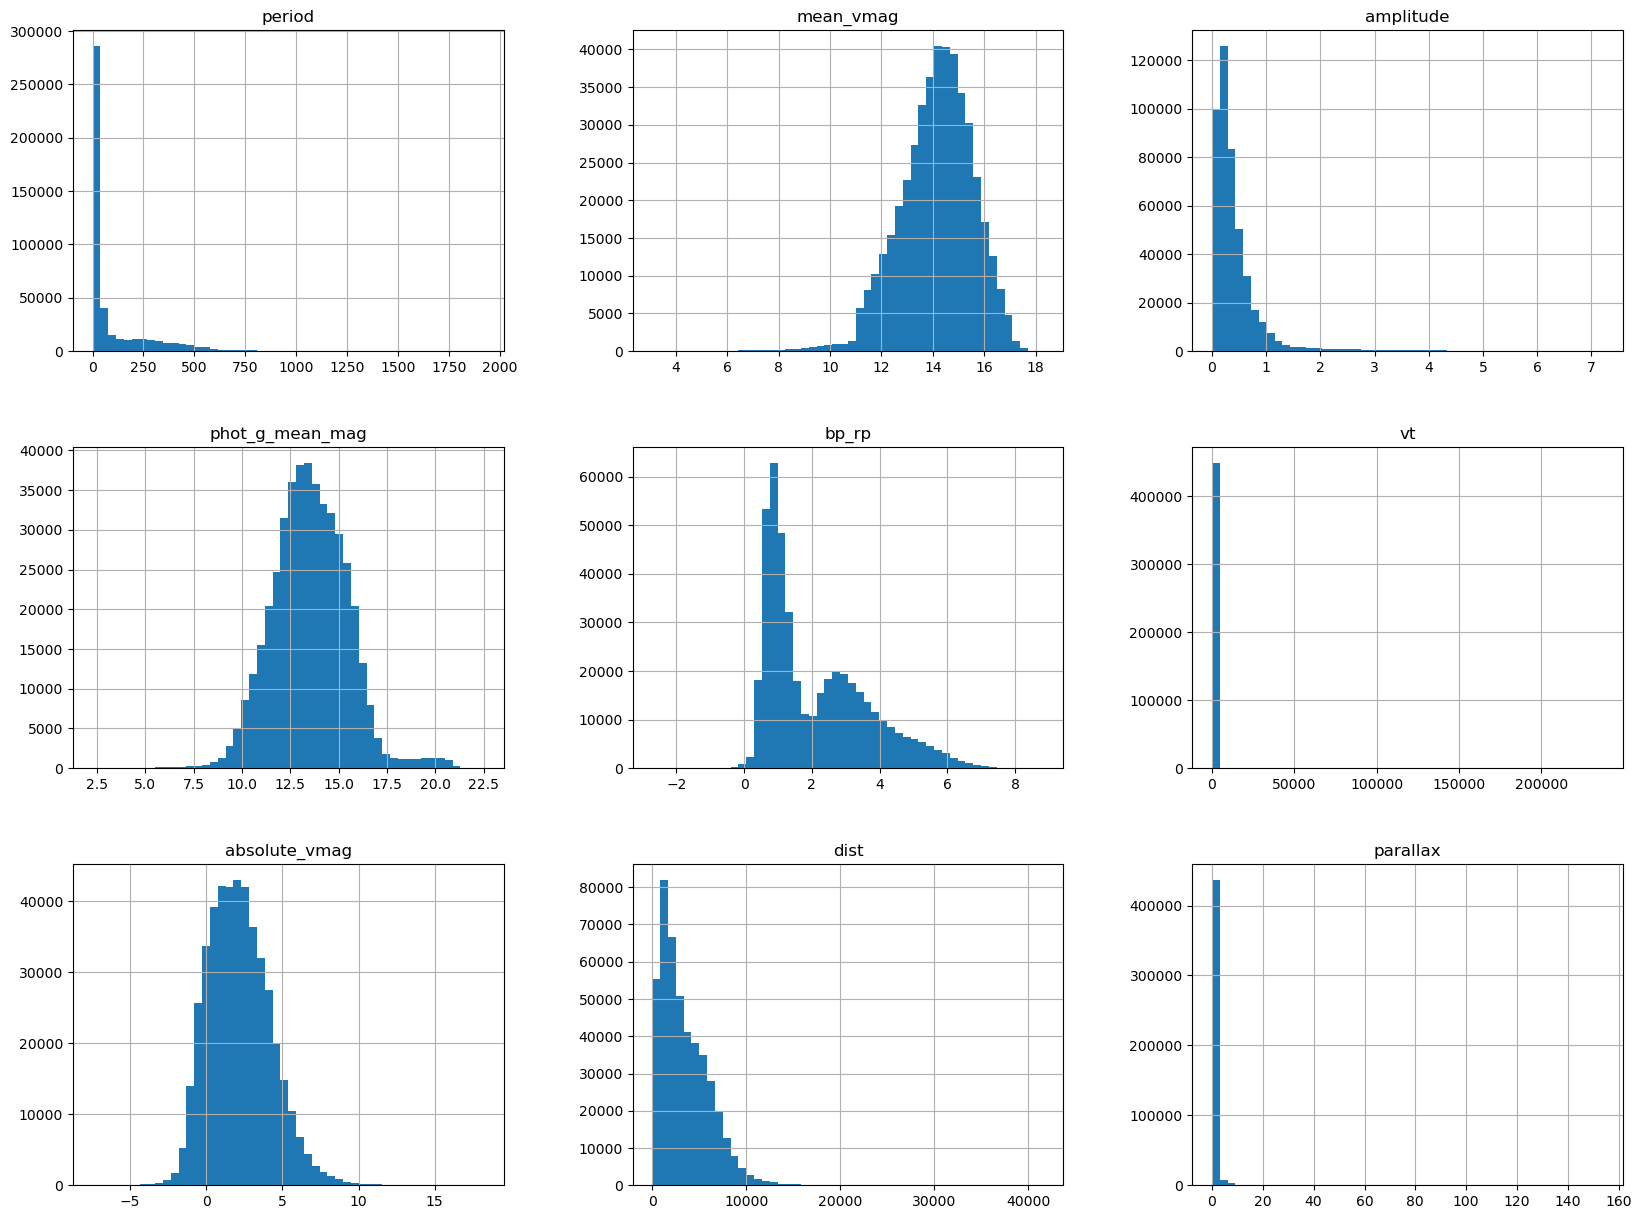

In [16]:
df1.hist(bins=50,figsize=(20,15))
plt.show()

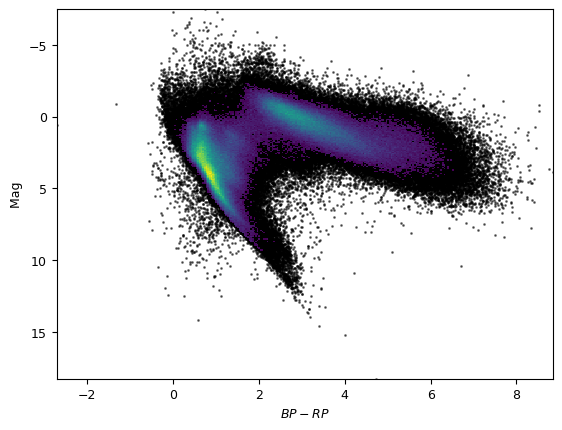

In [17]:
bp_rp = df1["bp_rp"]
mg = df1["absolute_vmag"]

plt.rcParams['font.size'] = 9

h = plt.hist2d(bp_rp, mg, bins=300, cmin=10, norm=colors.PowerNorm(0.7), zorder=0.5)
plt.scatter(bp_rp, mg, alpha=0.5, s=1, color='k', zorder=0)
plt.gca().invert_yaxis()
plt.xlabel(r'${BP} - {RP}$')
plt.ylabel(r' Mag ')
plt.show()

**Renk-Parlaklık diyagramını**, üst grafikte gösterdim. Bu diyagram aynı zamanda Hertzsprung-Russell (HR) diyagramı olarak da bilinir. Grafik, x-ekseninde BP-RP renk ölçeği, y-ekseninde mutlak parlaklığı değerleri vardır. Magnitude(Mag) azaldıkça yıldız daha parlak olur.

**HR diyagramı**, yıldızların renklerini (veya sıcaklıklarını) ve parlaklıklarını karşılaştırmak için kullanılan bir grafiktir. Bu diyagram, bir yıldızın sıcaklığının (veya renginin) parlaklığına göre nasıl değiştiğini gösterir. HR diyagramı, yıldızların evrimini ve farklı evrensel popülasyonları ve yıldız sınıflarını anlamak için temel bir araçtır. Ayrıca, yıldızların fiziksel özelliklerini anlamak ve evrenin yapılarını ve gelişimini incelemek için kullanılır.


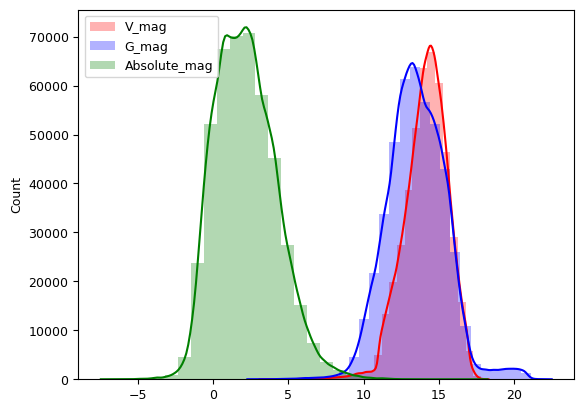

In [18]:
sns.histplot(df1['mean_vmag'], bins=30, color='red', alpha=0.3, kde=True, label='V_mag', edgecolor=None)
sns.histplot(df1['phot_g_mean_mag'], bins=30, color='blue', alpha=0.3, kde=True, label='G_mag', edgecolor=None)
sns.histplot(df1['absolute_vmag'], bins=30, color='green', alpha=0.3, kde=True, label='Absolute_mag', edgecolor=None)
plt.xlabel('')
plt.legend(loc='upper left')
plt.show()

V bandı parlaklığı, G bandı parlaklığı ve V bandındaki Mutlak parlaklık olmak üzere histogramlar parlaklıkları gösteriyor. Bu histogramı bandlara göre parlaklıkların nasıl değiştiğini görmek için çizdirdim. Parlaklık magnitude(kadir) olduğu için ters skaladadır. Küçük değerlere sahip değerler daha parlaktır.

In [19]:
class_counts= df1['variable_type'].value_counts()
class_counts

variable_type
SR        189009
EW         75084
EA         47488
ROT        36132
RRAB       29269
EB         24493
RRC        10148
VAR         9158
M           9026
ROT:        5810
DSCT        4460
HADS        4168
DCEP        1184
GCAS:        702
CWB          589
CWA          562
RRD          495
M:           449
YSO          431
DCEPS        375
DSCT:        236
SRD          220
LSP          178
UG           169
RVA          141
UGSU          53
ELL           51
RRAB:         36
UV            35
SXPHE         32
ZAND          28
RCB           25
CV            17
GCAS          17
AM            16
UGSS          15
PPN            8
CV:            7
RCB:           7
HMXB           7
UV:            5
R              5
WR             5
AM+E           5
UGWZ           5
DQ             5
SXARI          3
UGZ            2
DYPer          2
UGSU+E         1
SDOR           1
AM:            1
UGER           1
ZZO            1
Name: count, dtype: int64

In [20]:
top_10_classes = class_counts.index[:10]
top_10_classes

Index(['SR', 'EW', 'EA', 'ROT', 'RRAB', 'EB', 'RRC', 'VAR', 'M', 'ROT:'], dtype='object', name='variable_type')

Değişen Yıldız alt türlerinden en çok olan 10 tanesini seçiyorum.

`1. SR = Yarı düzenli (Semi Regular) Değişenler (Pulsating)`  
`2. EW = W UMa türü Örten Değişenler (Eclipsing) `  
`3. EA = Algol türü Örten Değişenler (Eclipsing) `  
`4. ROT = Dönen Değişenler (Rotating) `  
`5. RRAB =  Asimetrik ışık eğrili RR Lyrae Değişenler (Pulsating)`  
`6. EB = Beta Lyr türü Örten Değişenler (Eclipsing) `  
`7. RRC = Simetrik ışık eğrili RR Lyrae Değişenler (Pulsating)`
`8. VAR = Dönen Değişenler (Rotating)`  
`9. M = Uzun periyodlu MIRA (Pulsating)`
`10. ROT. = Rotational Variables(Rotating)`
  

In [21]:
df1['variable_type'] = df1['variable_type'].where(df1['variable_type'].isin(top_10_classes), 'diger')

In [22]:
def classify_var_type(var_type):
    pulsating_types = ['RRAB', 'SR','RRC','M']
    rotating_types = ['ROT', 'ROT:','VAR']
    eclipsing_types = ['EA', 'EB', 'EW']
    
   

    if var_type in pulsating_types:
        return 'Pulsating'
    elif var_type in rotating_types:
        return 'Rotating'
    elif var_type in eclipsing_types:
        return 'Eclipsing'
    else:
        return 'Diger'

In [23]:
df1['VarType'] = df1['variable_type'].apply(classify_var_type)

In [24]:
df1 = df1[df1['VarType'] != 'Diger']

In [25]:
df1.shape

(435617, 11)

In [26]:
class_counts= df1['VarType'].value_counts()
class_counts

VarType
Pulsating    237452
Eclipsing    147065
Rotating      51100
Name: count, dtype: int64

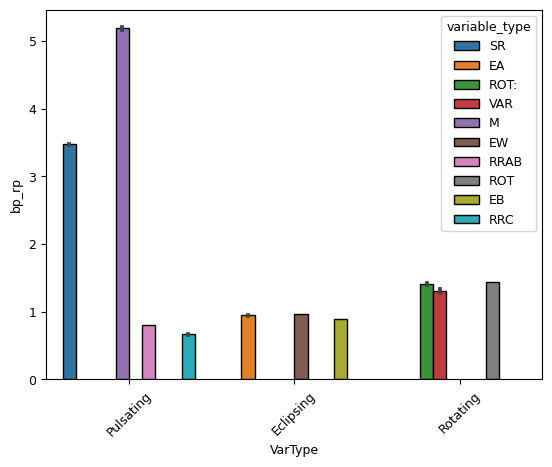

In [27]:
sns.barplot(x = 'VarType', y = 'bp_rp',hue ='variable_type', data=df1,edgecolor='black');
plt.xticks(rotation=45)
plt.show()

***VarType*** ve ***variable_type*** değişkenlerine göre ***bp_rp*** değerlerinin çubuk grafik olarak gösterilmesini sağlar.

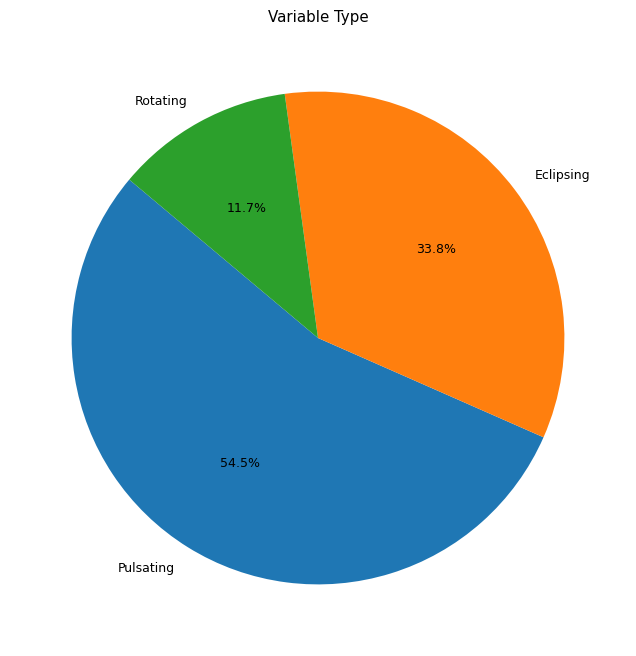

In [28]:
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Variable Type')
plt.show()

<Axes: xlabel='VarType', ylabel='count'>

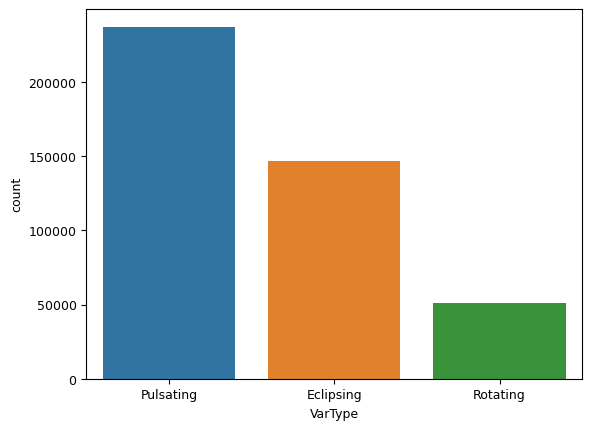

In [29]:
sns.countplot(x='VarType', data=df1)

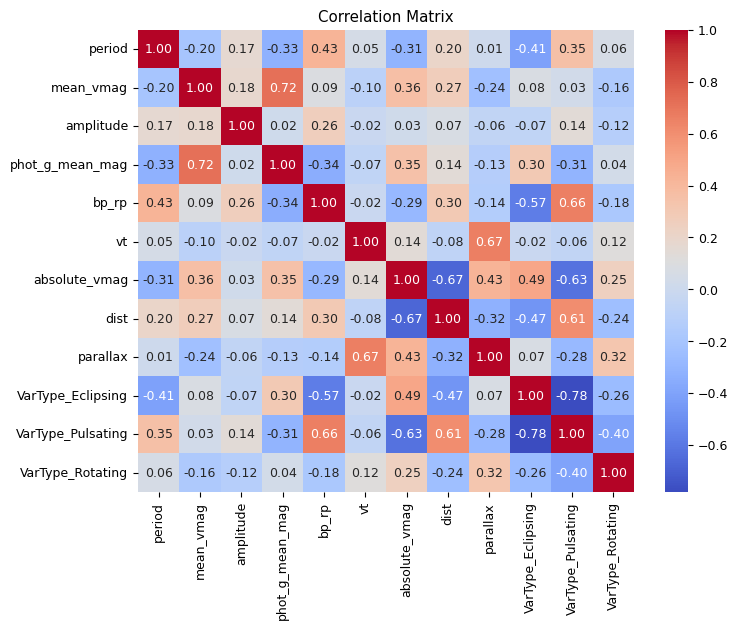

In [30]:
df1['VarType'] = df1['VarType'].astype('category')
df_encoded = pd.get_dummies(df1, columns=['VarType'], drop_first=False)
df_= df_encoded.drop(columns=['variable_type'])


correlation_matrix = df_.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Modelimde kullanacağım özellikler arasındaki ilişkileri görmek için *Korelasyon matrisi* oluşturdum. ***VarType*** sütunundaki kategorik değerlere dönüştürmek için ***.astype()*** kullandım. ***VarType*** sütunundaki kategorik değerleri ikili kodlamaya (0,1) dönüştürmek için ***pd.get_dummies*** kullandım. ***.drop*** ile istemediğim özellikleri çıkardım.

In [31]:
class_labels = ['eclipsing', 'pulsating','rotating']

In [32]:
X = df1.drop(['VarType', 'variable_type', 'dist','absolute_vmag','vt','parallax'], axis=1).values
Y = df1['VarType'].astype('category').cat.codes

Train ve Test için kullanacağım özellikleri seçmek için X ve Y listeleri oluşturdum. Y değişkeninde sınıflama yapacağım Değişen Yıldız Türleri (***VarType***) var. Bunları kategorik değerlere çevirdim. X değişkeinin de ise modelde kullanacağım özellikleri seçiyorum. En başta modelde kullanmak içn 10 özellik seçmiştim ve moedli çalıştırdığımda ***Overfitting*** (Aşırı öğrenme) olduğu için özellik sayısını azalttım.

In [33]:
X.shape

(435617, 5)

In [34]:
Y.shape

(435617,)

Metrics for Decision Tree:
Accuracy: 0.9052
Precision: 0.9054
Recall: 0.9052
F1 Score: 0.9053

Metrics for Random Forest:
Accuracy: 0.9365
Precision: 0.9366
Recall: 0.9365
F1 Score: 0.9364

Metrics for Bagging:
Accuracy: 0.9308
Precision: 0.9308
Recall: 0.9308
F1 Score: 0.9306

Metrics for XGBoost:
Accuracy: 0.9379
Precision: 0.9379
Recall: 0.9379
F1 Score: 0.9378

Metrics for KNN:
Accuracy: 0.9201
Precision: 0.9196
Recall: 0.9201
F1 Score: 0.9198


Best Classifier: XGBoost
Best Metrics: (0.9379160736421652, 0.9379216085544285, 0.9379160736421652, 0.9378356141391828)


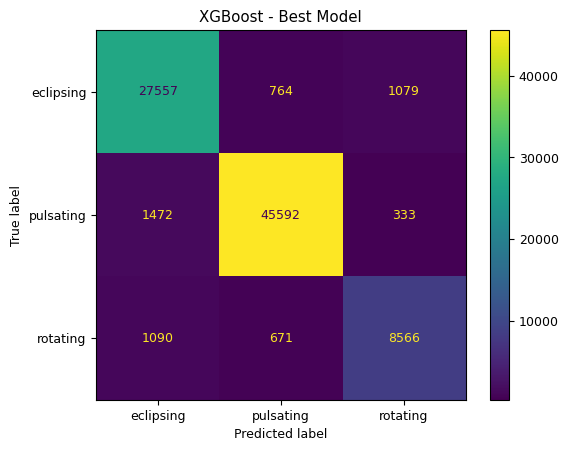

In [35]:
def evaluate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

def train_evaluate_classifiers(classifiers, X, Y, class_labels):
    best_acc = 0
    best_model = None
    best_metrics = None
    best_title = ''

    for title, classifier in classifiers.items():
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

        clf = classifier.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        accuracy, precision, recall, f1 = evaluate_metrics(y_test, y_pred)

        print(f"Metrics for {title}:\n"
              f"Accuracy: {accuracy:.4f}\n"
              f"Precision: {precision:.4f}\n"
              f"Recall: {recall:.4f}\n"
              f"F1 Score: {f1:.4f}\n"
             )

        if accuracy > best_acc:
            best_acc = accuracy
            best_model = clf
            best_metrics = (accuracy, precision, recall, f1)
            best_title = title

    print(f"\nBest Classifier: {best_title}")
    print(f"Best Metrics: {best_metrics}")

    cm = confusion_matrix(y_test, best_model.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot()
    plt.title(f'{best_title} - Best Model')
    plt.show()

classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'XGBoost': XGBClassifier(),
    'KNN': KNeighborsClassifier(),
}

train_evaluate_classifiers(classifiers, X, Y, class_labels)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [37]:
clf1 = XGBClassifier().fit(X_train,y_train)

Çıkan sonuçlara göre XGBoost modelini eğitiyorum.

In [42]:
xgb_params = {
    'n_estimators': range(100, 1500, 200), 
    'learning_rate': [0.01, 0.1], 
    'max_depth': range(1, 5, 1), 
    'gamma': [0, 0.5, 1.0],  #
    'booster': ['gbtree', 'gblinear','dart'],
    'min_child_weight': range(1, 6, 1)
}

***XGBoost*** modelinin *hiperparametre* parametrelirini belirten bir grid. Her bir hiperparametre için belirli değerler veya değer aralıkları girdim.

`1. n_estimators =  Oluşturulacak ağaç sayısı  `  
`2. learning_rate = Her ağaç eğitildiğinde, sonraki ağaçların öğrenme hızını kontrol eder.  `  
`3. max_depth =  Her bir ağacın maksimum derinliği.`  
`4. gamma =  XGBoost algoritmasında bir düğümün bölünme yapılabilmesi için gereken minimum kayıp düşüşünü kontrol eder.`  
`5. booster = XGBoost'un kullanacağı model tipini belirler. `  
`6. min_child_weight = Yaprak düğümlerindeki minimum ağırlık. `  

In [43]:
clf_randomcv_model = RandomizedSearchCV(estimator=clf1, param_distributions=xgb_params, n_iter=6, cv=3, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print('En iyi parametreler:',clf_randomcv_model.best_params_)
print('En iyi Accuracy skoru :',clf_randomcv_model.best_score_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
En iyi parametreler: {'n_estimators': 900, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 1.0, 'booster': 'gbtree'}
En iyi Accuracy skoru : 0.9242969046119316


***Randomized Search Cross Validation*** (Rastgele Arama Çapraz Doğrulama) kullanarak XGBoost modelinin en iyi hiperparametrelerini bulur. ***Cross Validation*** değerini 3 seçtim.


In [44]:
best_model_rcv = clf_randomcv_model.best_estimator_

In [52]:
y_pred_randomcv = best_model_rcv.predict(X_test)
print (classification_report (y_test, y_pred_randomcv))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     29400
           1       0.97      0.95      0.96     47397
           2       0.85      0.80      0.82     10327

    accuracy                           0.92     87124
   macro avg       0.90      0.89      0.90     87124
weighted avg       0.93      0.92      0.92     87124



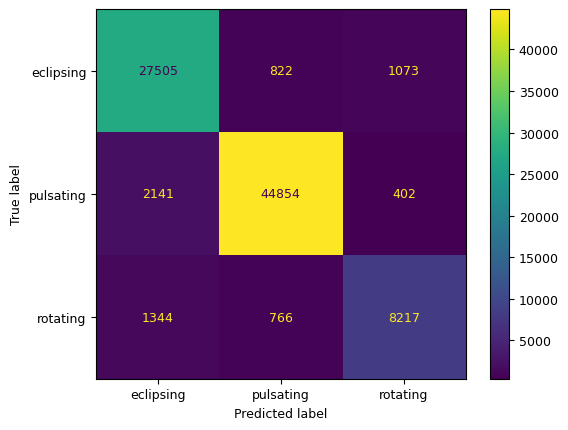

In [48]:
cm_randomcv = confusion_matrix(y_test, y_pred_randomcv)
class_labels = ['eclipsing', 'pulsating', 'rotating']
disp = ConfusionMatrixDisplay(confusion_matrix=cm_randomcv, display_labels=class_labels)
disp.plot()
plt.show()